##  IPL Analysis

Importing important libraries for analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset into dataframe

In [3]:
data=pd.read_csv('deliveries.csv')
match_data = pd.read_csv('matches - matches.csv')

In [4]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


shape of dataframe

In [6]:
data.shape

(150460, 21)

In [7]:
match_data.shape

(636, 18)

Checking for null values in the Dataframe

In [8]:
data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

### Dropping columns -  player_dismissed ,dismissal_kind  ,fielder as they contains many null value             

In [9]:
data = data.drop(columns = ["player_dismissed" ,"dismissal_kind"  ,"fielder"] , axis = 1)

In [10]:
data.isnull().mean()

match_id         0.0
inning           0.0
batting_team     0.0
bowling_team     0.0
over             0.0
ball             0.0
batsman          0.0
non_striker      0.0
bowler           0.0
is_super_over    0.0
wide_runs        0.0
bye_runs         0.0
legbye_runs      0.0
noball_runs      0.0
penalty_runs     0.0
batsman_runs     0.0
extra_runs       0.0
total_runs       0.0
dtype: float64

## checking Null values for match_data

In [11]:
match_data["city"].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [12]:
match_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [13]:
## filling city null values by "Mumbai" as most number of matches is played there

match_data["city"] = match_data["city"].fillna("Mumbai")

In [14]:
match_data.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [15]:
## dropping umpire3 column and changing umpire1 and umpire2 value by mean
match_data = match_data.drop("umpire3" ,axis = 1)

In [16]:
match_data['umpire1'].mode()[0]

'HDPK Dharmasena'

In [17]:
match_data['umpire1'] = match_data['umpire1'].fillna(match_data['umpire1'].mode()[0] ,  axis = 0)
match_data['umpire2'] = match_data['umpire2'].fillna(match_data['umpire2'].mode()[0] ,  axis = 0)

In [18]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')

In [19]:
data['batsman'].values

array(['DA Warner', 'DA Warner', 'DA Warner', ..., 'Iqbal Abdulla',
       'Sachin Baby', 'Iqbal Abdulla'], dtype=object)

In [20]:
match_data.dropna(axis = 0)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


<AxesSubplot:xlabel='Teams', ylabel='number of matches'>

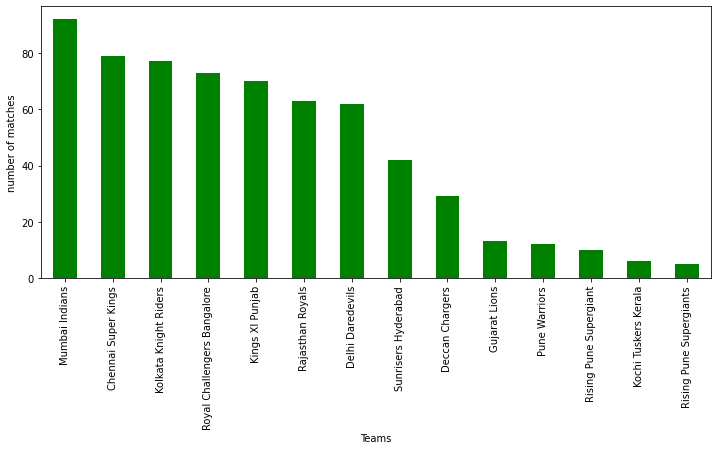

In [21]:
winners = match_data['winner'].value_counts()
winners.plot(kind = "bar" ,xlabel = "Teams" , ylabel = "number of matches" ,figsize=(12,5),color = 'green')

## conclusion :  As we can see Mumbai Indian is the strongest team  as it has most number of matches


### who won palyer of the match most number of times

<AxesSubplot:ylabel='Number of times player of the match'>

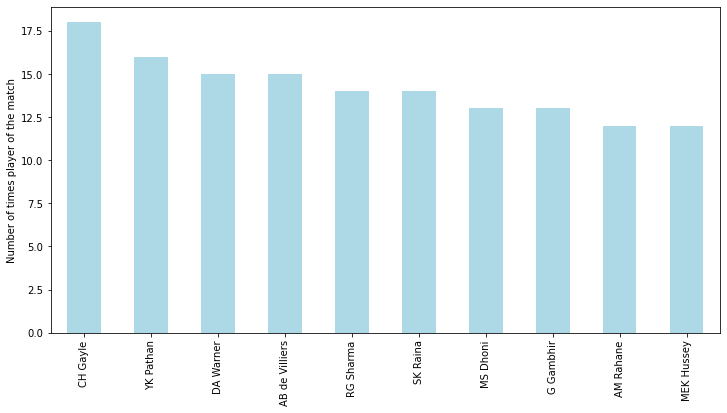

In [22]:
match_data['player_of_match'].value_counts().head(10).plot(kind = "bar" , ylabel = "Number of times player of the match" , figsize = (12,6) , color = "lightblue")

## Total runs by each team till season


In [23]:
data.groupby(['batting_team'])['total_runs'].sum().sort_values(ascending=False)


batting_team
Mumbai Indians                 24521
Royal Challengers Bangalore    23436
Kings XI Punjab                23068
Kolkata Knight Riders          21965
Delhi Daredevils               21953
Chennai Super Kings            20899
Rajasthan Royals               17703
Sunrisers Hyderabad            11652
Deccan Chargers                11463
Pune Warriors                   6358
Gujarat Lions                   4862
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64

In [24]:
data.groupby

<bound method DataFrame.groupby of         match_id  inning                 batting_team  \
0              1       1          Sunrisers Hyderabad   
1              1       1          Sunrisers Hyderabad   
2              1       1          Sunrisers Hyderabad   
3              1       1          Sunrisers Hyderabad   
4              1       1          Sunrisers Hyderabad   
...          ...     ...                          ...   
150455       636       2  Royal Challengers Bangalore   
150456       636       2  Royal Challengers Bangalore   
150457       636       2  Royal Challengers Bangalore   
150458       636       2  Royal Challengers Bangalore   
150459       636       2  Royal Challengers Bangalore   

                       bowling_team  over  ball        batsman    non_striker  \
0       Royal Challengers Bangalore     1     1      DA Warner       S Dhawan   
1       Royal Challengers Bangalore     1     2      DA Warner       S Dhawan   
2       Royal Challengers Bangalore  

In [25]:
runs=data.groupby('batsman')

In [29]:
runs.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0
12,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,6,MC Henriques,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0
66,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,5,Yuvraj Singh,MC Henriques,STR Binny,0,0,0,0,0,0,2,0,2
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144067,609,2,Rising Pune Supergiants,Delhi Daredevils,1,5,UT Khawaja,AM Rahane,J Yadav,0,0,0,0,0,0,1,0,1
145601,615,2,Kings XI Punjab,Royal Challengers Bangalore,18,1,F Behardien,MP Stoinis,CJ Jordan,0,0,0,0,0,0,4,0,4
145740,616,1,Sunrisers Hyderabad,Rising Pune Supergiants,20,5,BB Sran,B Kumar,A Zampa,0,0,0,0,0,0,1,0,1
146813,620,2,Gujarat Lions,Royal Challengers Bangalore,19,4,S Kaushik,PV Tambe,Sachin Baby,0,0,0,0,0,0,0,0,0


In [27]:
runs.get_group('V Kohli')['batsman_runs']

2590      0
2591      1
2593      0
2594      1
2597      0
         ..
150410    1
150413    6
150414    2
150415    2
150416    0
Name: batsman_runs, Length: 3494, dtype: int64

### By how much runs have teams have won

<AxesSubplot:ylabel='Frequency'>

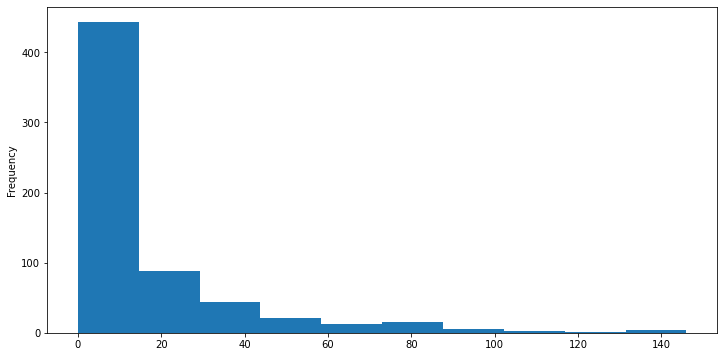

In [31]:
match_data['win_by_runs'].plot(kind='hist',xlabel="" ,figsize=(12,6))

In [ ]:
runs['batsman_runs'].sum().sort_values(ascending=False)

In [23]:
mask3=data['batsman_runs']==6
new_data=data[mask3]

In [24]:
new_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


### Most number of centuries in IPL

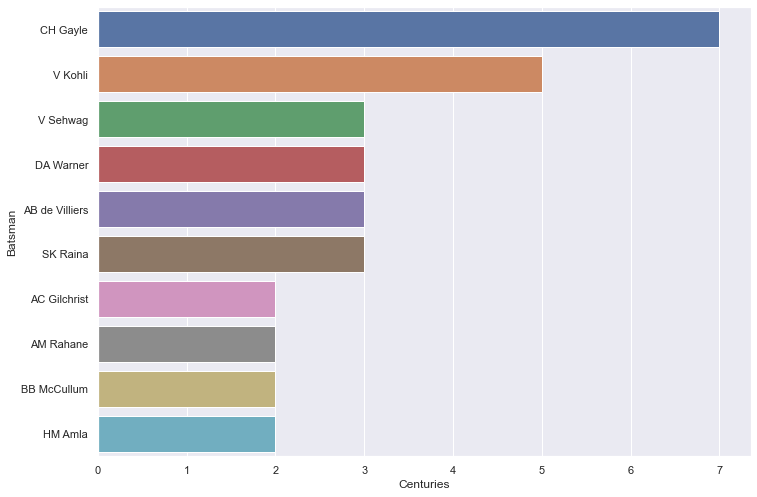

In [158]:
runs_per_match = data.groupby(['batsman','match_id'])['total_runs'].sum()
century=runs_per_match[runs_per_match >= 100].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y=century.index,x=century,orient='h')
plt.xlabel('Centuries')
plt.ylabel('Batsman')
plt.show()


### Most half- century in IPL
Top 10 Players

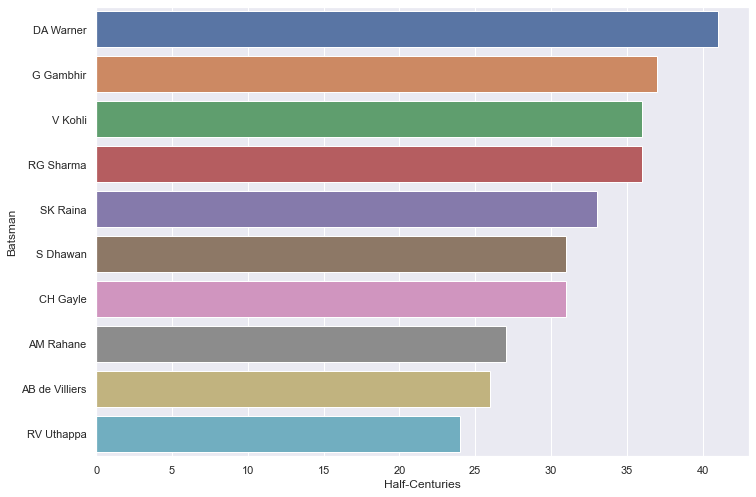

In [162]:
halfcentury = runs_per_match[runs_per_match >= 50].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10]
sns.barplot(y=halfcentury.index,x=halfcentury,orient='h')
plt.xlabel('Half-Centuries')
plt.ylabel('Batsman')
plt.show()

### Most sixes in IPL by Playes

In [192]:
six = runs_per_match[runs_per_match == 6]
six.groupby('batsman').value_counts().sort_values(ascending = False)

batsman           total_runs
BB McCullum       6             7
DPMD Jayawardene  6             6
AM Rahane         6             6
RG Sharma         6             6
IK Pathan         6             5
                               ..
MF Maharoof       6             1
DJG Sammy         6             1
MD Mishra         6             1
MC Henriques      6             1
CA Lynn           6             1
Name: total_runs, Length: 168, dtype: int64

## Most 4's in IPL 

In [195]:
runs_per_match[runs_per_match == 4].groupby('batsman').value_counts().sort_values(ascending=False)


batsman          total_runs
RV Uthappa       4             6
V Sehwag         4             6
Harbhajan Singh  4             6
KC Sangakkara    4             5
IK Pathan        4             5
                              ..
J Syed Mohammad  4             1
J Suchith        4             1
Ishan Kishan     4             1
I Sharma         4             1
M Rawat          4             1
Name: total_runs, Length: 190, dtype: int64

### Highest score by a player in IPL

In [220]:
runs_per_match.sort_values(ascending=False).head(3)

batsman         match_id
CH Gayle        411         181
BB McCullum     60          169
AB de Villiers  562         138
Name: total_runs, dtype: int64

Chris Gayle has the Highest score of 181 runs 

In [221]:
## Exploring about Virat Kohli

In [197]:
vk=data[data['batsman']=='V Kohli']


In [199]:
vk.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,1,0,0,0,0,0,1,1
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,1,0,1
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,0,0,0
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,1,0,1
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,0,0,0,0,0,0,0,0


### Runs Virat Kohli scored against each team

In [201]:
vk.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head()

bowling_team
Chennai Super Kings    706
Delhi Daredevils       661
Kings XI Punjab        483
Mumbai Indians         447
Sunrisers Hyderabad    439
Name: batsman_runs, dtype: int64

### Death over is the last 5 overs of the match\

In [204]:
death_over = data[data['over']>15]

In [205]:
death_over.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
93,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,1,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0


### Which player scored most runs in death overs 

In [206]:
all_batsman = death_over.groupby('batsman')['batsman_runs'].count()

<AxesSubplot:xlabel='batsman'>

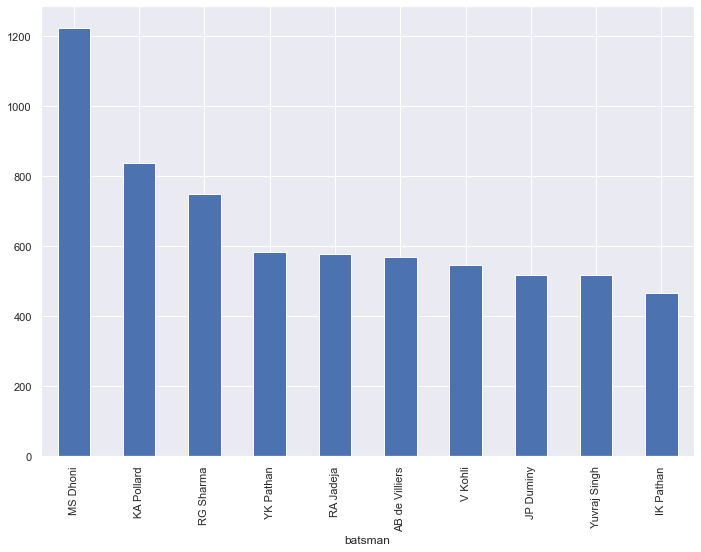

In [210]:
all_batsman.sort_values(ascending = False).head(10).plot(kind = "bar")

In [226]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


### Bowler who gave the most runs in a match

In [232]:
data.groupby(['bowler','match_id'])['total_runs'].sum().sort_values(ascending = False).head()


bowler          match_id
I Sharma        435         66
Sandeep Sharma  496         66
UT Yadav        438         65
PJ Cummins      44          65
AB Dinda        395         63
Name: total_runs, dtype: int64

### Bowler who gave the least runs in a match

In [235]:
data.groupby(['bowler','match_id'])['total_runs'].sum().sort_values().head()


bowler        match_id
RA Jadeja     115         0
SK Raina      232         0
Z Khan        571         0
AC Gilchrist  450         0
SK Raina      285         0
Name: total_runs, dtype: int64

In [240]:
match_data.groupby('season')["winner"].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 84, dtype: int64